***
## Create dummy data to try the Code yourself:
- 3 groups of mice: `ctrl`, `exp`, `ctrl2` (2 mice per group): 
  - `ctrl` is stable over time
  - `ctrl2` jumps randomly
  - `exp` decreases over time
- 3 time_points (session_id) with 5 trials per mouse (trial_id) = in total 15 trials per mouse

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
test_data = {
    "Data": list(np.random.randint(250, 301, size=15)) + list(np.random.randint(250, 301, size=15)) + sorted(list(np.random.randint(100, 301, size=15)), reverse=True) + sorted(list(np.random.randint(50, 150, size=15)), reverse=True) + list(np.random.randint(100, 301, size=15)) + list(np.random.randint(50, 251, size=15)),
    "group_id": ["ctrl"]*30 + ["exp"]*30 + ["ctrl2"]*30,
    "subject_id": ["a_good_stable_mouse"]*15 + ["a_bad_stable_mouse"]*15 + ["started_good_but_worsened"]*15 + ["started_poor_and_worsened"]*15 + ["flickering_around"]*15 + ["flickering_around_low"]*15,
    "session_id": (["1"]*5 + ["2"]*5 + ["3"]*5)*6,
    "trial_id": [1, 2, 3, 4, 5]*18,
    "subgroup": ["test"]*90
}

test_df = pd.DataFrame(test_data)
test_df.to_csv("test.csv", index = False)
test_df.head()

,Data,group_id,subject_id,session_id,trial_id,subgroup
0,258,stable,a_good_stable_mouse,1,1,test
1,285,stable,a_good_stable_mouse,1,2,test
2,299,stable,a_good_stable_mouse,1,3,test
3,268,stable,a_good_stable_mouse,1,4,test
4,283,stable,a_good_stable_mouse,1,5,test


***
## Rotarod Analysis
- Rotarod Mode: Ramp
   - the higher the score, the better the trial
   - trials were repeated at certain timepoints to see development of differences over time
   
> Using raw scores seemes to disregard pre-experimental locomotory abilities between animals. 
> To represent individual changes, we decided to normalize the score to a baseline performance.

***
### Import dependencies and analysis code

In [ ]:
import seaborn as sns
import Rotarod.rotarod_analysis as rot
import matplotlib.pyplot as plt
from pathlib import Path

### set necessary inputs
- `path`: the path to the excel- or csv-file containing your data
   - supported filetypes: .xlsx and .csv
- `lines_to_include_in_analysis` if you want to select certain lines, set the name of the lines here; if None, all lines in the dataframe are selected
   - the name of the line needs to be included in the id of the subject in the dataframe column "subject_id"
- `subgroup`: if only a certain subgroup of data should be selected (subgroup has to be in column "subgroup" of the dataframe)
- `session`: if only certain sessions should be selected (sessions have to be in "session_id" column of the dataframe)
- `animals_to_exclude`: if certain animals have to be excluded in analysis due to any reason, set the subject_ids of the animals here 
- `dropfirst` if the first trial should be excluded, set True, else all of the trials will be analysed
   - in our example, the first trial is somewhat of a "warm-up", so we will exclude it

__if you made changes here, re-run all the cells below to make sure that the analysis was performed on the right data set__

In [ ]:
path = "test.csv" # str
lines_to_include_in_analysis = None # None or list of str
subgroup = None # None or str
sessions = None # None or list of str
animals_to_exclude = None # None or list of str
dropfirst = True # True or False

### load the data
a message with the individual subjects found in the dataframe will be printed

In [ ]:
df = rot.get_df(filename = path, lines = lines_to_include_in_analysis, animals_to_exclude = animals_to_exclude, subgroup=subgroup)

Found the following subjects:  ['a_good_stable_mouse', 'started_poor_and_worsened', 'flickering_around', 'flickering_around_low', 'a_bad_stable_mouse', 'started_good_but_worsened']


### run analysis
if no baseline_session is specified, the first session will be used as baseline for relative/raw analysis and will be printed

In [ ]:
analysis = rot.create_analysis_dfs(
    df = df,
    dropfirst = dropfirst,
    keep_dfs = True,
    baseline_session = None,
)

Since no session to use for baseline was specified, 1 will be used!


### specify the type of data you want to plot and save
- how to treat values of one animal at each session
   - mean: (mean, recommended)
   - median: (median)
   - max (maximum value)
- how to analyse the data: 
   - raw (raw score)
   - absolute (changes in score over time)
   - relative (changes in score over time, normalized to baseline session)

__=> mean_raw, max_raw, median_raw, mean_absolute, max_absolute, median_absolute, mean_relative, max_relative, median_relative__

In [ ]:
data_key = 'mean_relative' 
data = analysis[data_key]

### show the analysed data
1. per group
2. per individual subject

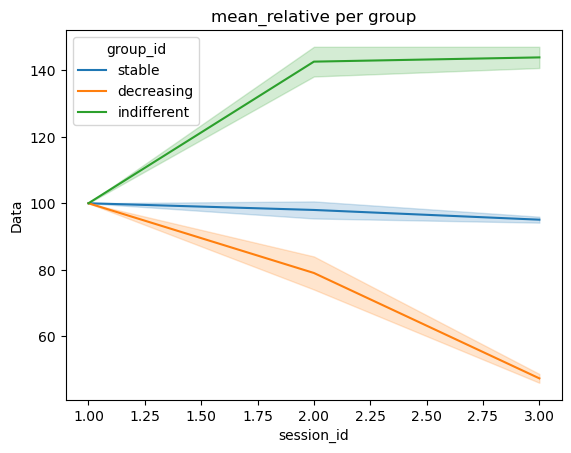

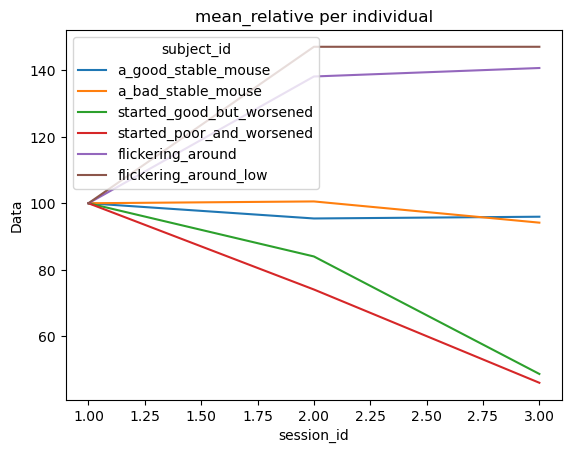

In [ ]:
fig = plt.figure()
sns.lineplot(data = data, y='Data', x='session_id', hue='group_id')
plt.title(f"{data_key} per group")
plt.show()

fig = plt.figure()
sns.lineplot(data = data, y='Data', x='session_id', hue='subject_id')
plt.title(f"{data_key} per individual")
plt.show()

### set a name for the output file

In [ ]:
output_filename = "out" # supported filetypes: .xlsx and .csv, default: .csv

## save the data 
(only the type of analysis specified as `data_key` will be saved)

In [ ]:
output_filename = Path(output_filename)
if output_filename.suffix == ".csv":
    data.to_csv(output_filename, index=False)
elif output_filename.suffix == ".xlsx":
    data.to_excel(output_filename, index=False)
else:
    data.to_csv(output_filename.with_suffix(".csv"), index=False)

- The format of the output .csv is directly compatible with the following statistic tool
> https://github.com/Defense-Circuits-Lab/stats_n_plots.git